In [1]:
# 사용할 데이터의 형태
data_type = '19'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 60             # 모델의 에포크 수
ba = 1000            # 모델의 배치 사이즈

In [2]:
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)
#with open(path+data_type+'sel_words'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
#    selected_words = pickle.load(f)

In [3]:
from tensorflow.keras.models import load_model
model = load_model('BestModel19-2')

In [4]:
# 모델의 예측값을 튜플로 반환하는 함수
import numpy as np
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])

In [5]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수
def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])
def div_tuple(a,b):
    return (a[0]/b,a[1]/b,a[2]/b)

In [6]:
#주가 데이터의 라벨링 과정
import csv
f = open('stock.csv','r', encoding='utf-8-sig')
rdf = csv.reader(f)
label ={}
for line in rdf:
    date = line[0][:4]+line[0][5:7]+line[0][8:10]
    number = float(line[6])
    label[date] = number
f.close()

In [7]:
predicted = {}
num_pred = {}
real = []
date = set()
pred = []
for data in test2_x:
    if data[1] in predicted:
        predicted[data[1]] = sum_tuple(predicted[data[1]],predict(data[0]))
        num_pred[data[1]] = num_pred[data[1]]+1
    else:
        predicted[data[1]] = predict(data[0])
        num_pred[data[1]] = 1
    date.add(data[1])
date = [d for d in date]
date.sort()
for d in date:
    pred.append(div_tuple(predicted[d],num_pred[d]))
    real.append(label[d])
    


In [8]:
up = [a for _,_,a in pred]
mid = [a for _,a,_ in pred]
down = [a for a,_,_ in pred]
mid_bottom = np.add(up,mid)
a = max(max(real),abs(min(real)))

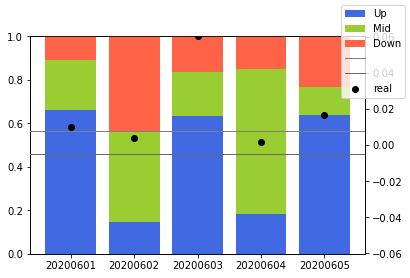

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(date[:5],up[:5],color='royalblue',zorder=1)
ax1.bar(date[:5],mid[:5],color='yellowgreen',bottom=up[:5],zorder=2)
ax1.bar(date[:5],down[:5],color='tomato',bottom=mid_bottom[:5],zorder=3)
ax1.set_ylim([0,1])
ax2.scatter(date[:5],real[:5],color='black',zorder=6)
ax2.axhline(y=0.0077,color='gray',linewidth=1,zorder=4)
ax2.axhline(y=-0.005,color='dimgray',linewidth=1,zorder=5)
ax2.set_ylim([-a,a])
fig.legend(['Up','Mid','Down','','','real'])
plt.show()

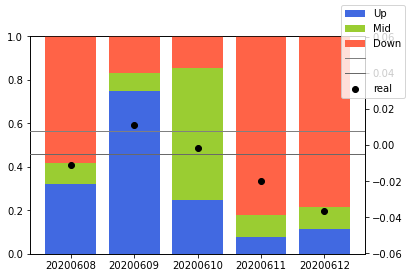

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(date[5:10],up[5:10],color='royalblue',zorder=1)
ax1.bar(date[5:10],mid[5:10],color='yellowgreen',bottom=up[5:10],zorder=2)
ax1.bar(date[5:10],down[5:10],color='tomato',bottom=mid_bottom[5:10],zorder=3)
ax1.set_ylim([0,1])
ax2.scatter(date[5:10],real[5:10],color='black',zorder=6)
ax2.axhline(y=0.0077,color='gray',linewidth=1,zorder=4)
ax2.axhline(y=-0.005,color='dimgray',linewidth=1,zorder=5)
ax2.set_ylim([-a,a])
fig.legend(['Up','Mid','Down','','','real'])
plt.show()

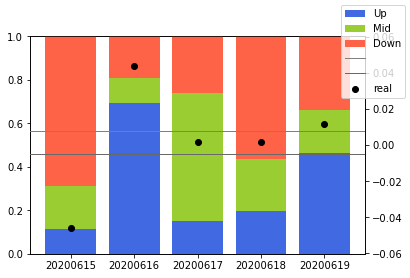

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(date[10:15],up[10:15],color='royalblue',zorder=1)
ax1.bar(date[10:15],mid[10:15],color='yellowgreen',bottom=up[10:15],zorder=2)
ax1.bar(date[10:15],down[10:15],color='tomato',bottom=mid_bottom[10:15],zorder=3)
ax1.set_ylim([0,1])
ax2.scatter(date[10:15],real[10:15],color='black',zorder=6)
ax2.axhline(y=0.0077,color='gray',linewidth=1,zorder=4)
ax2.axhline(y=-0.005,color='dimgray',linewidth=1,zorder=5)
ax2.set_ylim([-a,a])
fig.legend(['Up','Mid','Down','','','real'])
plt.show()

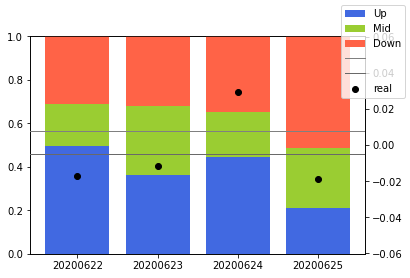

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(date[15:20],up[15:20],color='royalblue',zorder=1)
ax1.bar(date[15:20],mid[15:20],color='yellowgreen',bottom=up[15:20],zorder=2)
ax1.bar(date[15:20],down[15:20],color='tomato',bottom=mid_bottom[15:20],zorder=3)
ax1.set_ylim([0,1])
ax2.scatter(date[15:20],real[15:20],color='black',zorder=6)
ax2.axhline(y=0.0077,color='gray',linewidth=1,zorder=4)
ax2.axhline(y=-0.005,color='dimgray',linewidth=1,zorder=5)
ax2.set_ylim([-a,a])
fig.legend(['Up','Mid','Down','','','real'])
plt.show()

In [13]:
import re

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    print(date,real,value)
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)

20200624 1 1
20200623 -1 1
20200622 -1 1
20200625 -1 -1
20200601 1 1
20200602 0 -1
20200603 1 1
20200604 0 0
20200605 1 1
20200608 -1 -1
20200609 1 1
20200610 0 0
20200611 -1 -1
20200612 -1 -1
20200615 -1 -1
20200616 1 1
20200617 0 0
20200619 1 1
20200618 0 -1


In [14]:
print(test_score)

0.7894736842105263
